In [1]:
# ENGO Sentiment Analysis Visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

In [2]:
sys.path.append(os.path.abspath('..'))

In [3]:
# Add path for custom modules
sys.path.append(os.path.abspath('..'))
from src.plots import plot_sentiment_comparison3
from src.data_processing import (
    process_cop_data, 
    EVENTS_COP26, 
    EVENTS_COP27, 
    LEGEND_NAMES
)

In [4]:
# Define file paths
COP26_PATH = r"C:\Users\PsyLab-9221\Documents\thesis\ENGO-emotional-framing\data\results_file_cop26_sentiment+Relevance+Group_new_240624_split_1.xlsx"
COP27_PATH = r"C:\Users\PsyLab-9221\Documents\thesis\ENGO-emotional-framing\data\results_file_cop27_sentiment+Relevance+Group_new_240624_split_1.xlsx"


In [5]:
(cop26_groups, cop27_groups, cop26_overall, cop27_overall, 
 cop26_grouped, cop27_grouped, df_COP26_relevance, df_COP27_relevance) = process_cop_data(COP26_PATH, COP27_PATH)


In [6]:
# Quick data summary
print("Data Processing Complete!")
print(f"COP26 data shape: {len(cop26_groups[0])} days, {len(cop26_groups)} groups")
print(f"COP27 data shape: {len(cop27_groups[0])} days, {len(cop27_groups)} groups")

Data Processing Complete!
COP26 data shape: 28 days, 4 groups
COP27 data shape: 28 days, 4 groups


In [7]:
# Sample of processed data
print("\nSample of COP26 overall data:")
print(cop26_overall[['date', 'Sentiment Index', 'sum_twits']].head())


Sample of COP26 overall data:
        date  Sentiment Index  sum_twits
0 2021-10-23         0.009119   2.340426
1 2021-10-24        -0.062121   1.886364
2 2021-10-25         0.022215   3.465116
3 2021-10-26         0.027251   3.560976
4 2021-10-27         0.043900   3.570312


# Data Processing Results

The `process_cop_data()` function returns 8 DataFrames that organize the tweet data at different levels of aggregation:

## Tweet-Level Data (Most Granular)

**`df_COP26_relevance` and `df_COP27_relevance`** - Individual tweets filtered for relevance
- **Purpose**: Individual tweet analysis and detailed exploratory data analysis
- **Structure**: One row per tweet (most detailed level available)
- **Filtering**: Only includes tweets marked as relevant (Relevance = 1) to COP26/COP27 topics
- **Processing**: Includes parsed datetime, sentiment indicator columns (Positive, Negative, Neutral)
- **Use case**: 
  - Analyzing individual tweet content and patterns
  - Identifying most active organizations
  - Creating organization-level distributions and rankings
  - Content analysis and text mining
- **Key columns**: tweet, Name (organization), Group, label (sentiment), date, hour, Positive, Negative, Neutral

## Organization-Level Daily Data

**`cop26_grouped` and `cop27_grouped`** - Organization-level daily aggregated data
- **Purpose**: Detailed analysis and data exploration at the organization level
- **Structure**: One row per organization per date
- **Aggregation**: Individual tweets aggregated by organization and date
- **Use case**: 
  - Exploring data distributions (e.g., `sns.histplot(cop27_grouped['sum_twits'])`)
  - Identifying outliers or specific organizations of interest
  - Organization-level sentiment analysis over time
  - Data quality checks
- **Key columns**: date, Name (organization), Group, Positive, Negative, Neutral, sum_twits, Sentiment Index

## Group-Level Time Series Data

**`cop26_groups` and `cop27_groups`** - Lists containing 4 DataFrames each (one per organization group)
- **Purpose**: Compare sentiment trends between different types of organizations over time
- **Structure**: Each DataFrame contains daily averages for one group (Group 1, 2, 3, or 4)
- **Aggregation**: Organization-level data averaged by date within each group
- **Use case**: Creating line plots showing how each group's sentiment evolved during the conference
- **Key columns**: date, Sentiment Index, negative_percent, neutral_percent, positive_percent

## Overall Time Series Data  

**`cop26_overall` and `cop27_overall`** - Single DataFrames with daily averages across all organizations
- **Purpose**: Compare overall sentiment trends between COP26 and COP27
- **Structure**: One row per date with averages across all organizations and groups
- **Aggregation**: All organization-level data averaged by date
- **Use case**: Creating comparative plots between the two conferences
- **Key columns**: date, Sentiment Index, sum_twits (average daily tweet volume)

## Data Hierarchy Summary

```
Raw Tweet Data (all tweets)
    ↓ (filter for Relevance = 1)
df_COP26_relevance / df_COP27_relevance (individual relevant tweets)
    ↓ (aggregate by organization + date)
cop26_grouped / cop27_grouped (organization-level daily)
    ↓ (average by group + date)  
cop26_groups / cop27_groups (group-level daily)
    ↓ (average across all groups + date)
cop26_overall / cop27_overall (conference-level daily)
```

## Data Filtering Note

The **Relevance** column in the original data contains binary values (1 or 0), where:
- **1** = Tweet content is relevant to COP26/COP27 topics and climate change discussions
- **0** = Tweet content is not directly related to the conference themes

All processed DataFrames only include tweets with Relevance = 1, ensuring the analysis focuses on conference-relevant content.

Each level serves different analytical purposes, from detailed tweet-level exploration to high-level conference comparisons.

In [8]:
# =============================================================================
# DATA FREQUENCIES
# =============================================================================

c:\Users\PsyLab-9221\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sum_twits', ylabel='Count'>

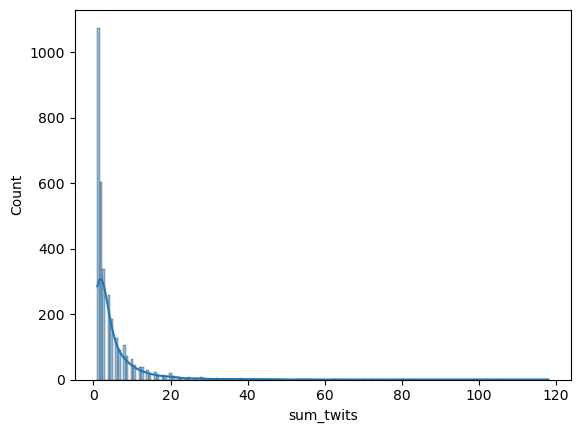

In [9]:
sns.histplot(data=cop27_grouped['sum_twits'], kde=True)

c:\Users\PsyLab-9221\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Sentiment Index', ylabel='Count'>

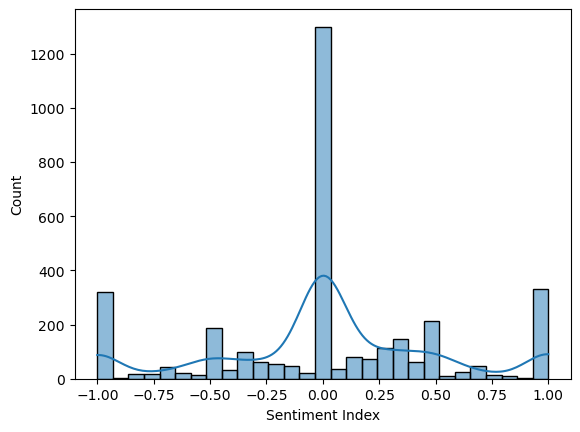

In [10]:
sns.histplot(data = cop26_grouped['Sentiment Index'], kde = True)

c:\Users\PsyLab-9221\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='negative_percent', ylabel='Count'>

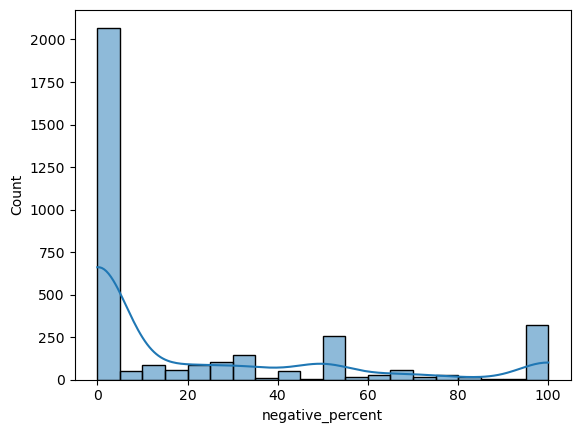

In [11]:
sns.histplot(data = cop26_grouped['negative_percent'],binwidth=5, kde = True)

c:\Users\PsyLab-9221\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Negative', ylabel='Count'>

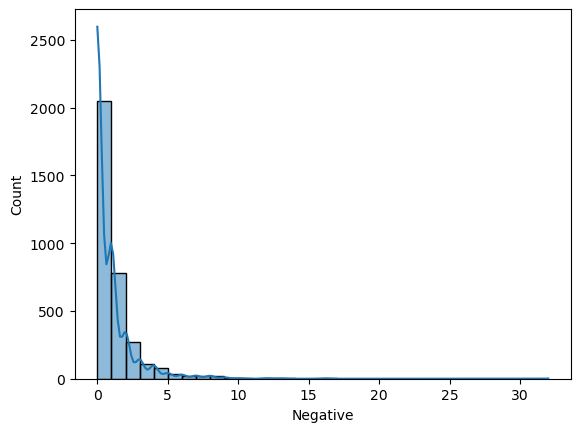

In [12]:
sns.histplot(data = cop26_grouped['Negative'],binwidth=1, kde = True)

c:\Users\PsyLab-9221\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


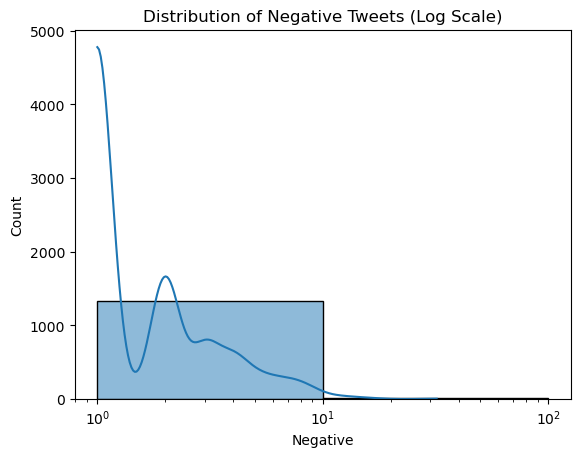

In [13]:
sns.histplot(data=cop26_grouped[cop26_grouped['Negative'] > 0]['Negative'], binwidth=1, kde=True, log_scale=True)

# Adding a title for clarity
plt.title('Distribution of Negative Tweets (Log Scale)')

# Show the plot
plt.show()

(array([3.183e+03, 1.490e+02, 4.400e+01, 1.600e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  7.8, 15.6, 23.4, 31.2, 39. , 46.8, 54.6, 62.4, 70.2, 78. ]),
 <BarContainer object of 10 artists>)

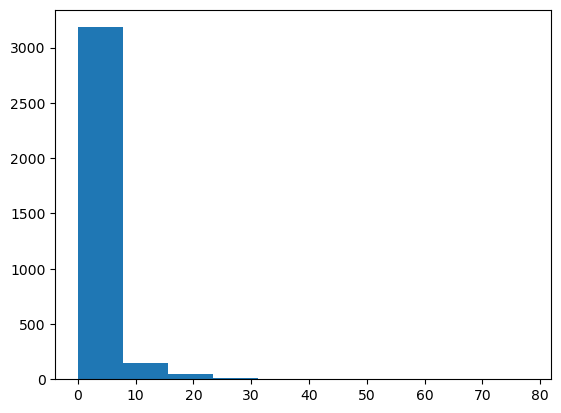

In [14]:
plt.hist(cop26_grouped['Neutral'])